# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

In [2]:
raw_data=pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")
raw_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
raw_data.shape

(3999, 12)

In [5]:
raw_data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


# NULL VALUES

In [7]:
raw_data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

# rename the column name

In [8]:
data=raw_data.rename({"Award?":"award","ID#":"id"},axis=1)
data

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# Convert the Column names to lower case

In [9]:
cols=data.columns.str.lower()
data.columns=cols
data

,id,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# drop ID Column

In [11]:
data1=data.drop(columns="id")
data1

,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


# Duplicate Columns

In [123]:
data[data.duplicated(keep=False)]

,id,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award


# visualizations

award
0    2518
1    1481
Name: count, dtype: int64

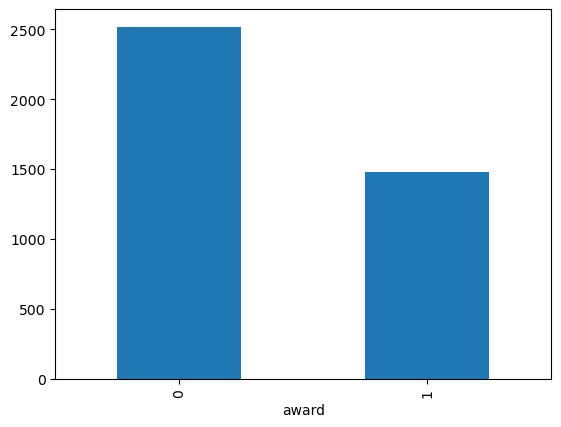

In [13]:
data["award"].value_counts().plot(kind="bar")
data["award"].value_counts()

cc1_miles
1    2289
3     613
4     525
5     288
2     284
Name: count, dtype: int64

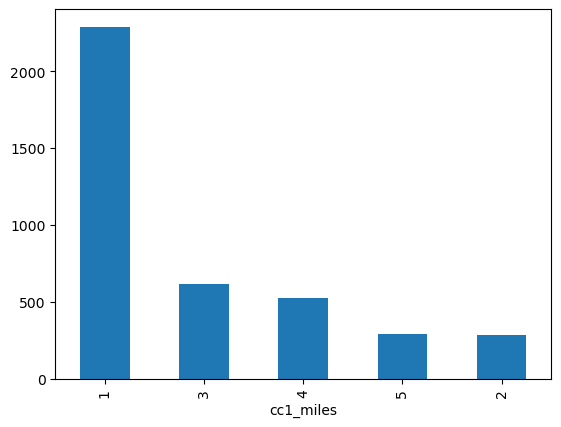

In [14]:
data["cc1_miles"].value_counts().plot(kind="bar")
data["cc1_miles"].value_counts()

cc2_miles
1    3956
2      28
3      15
Name: count, dtype: int64

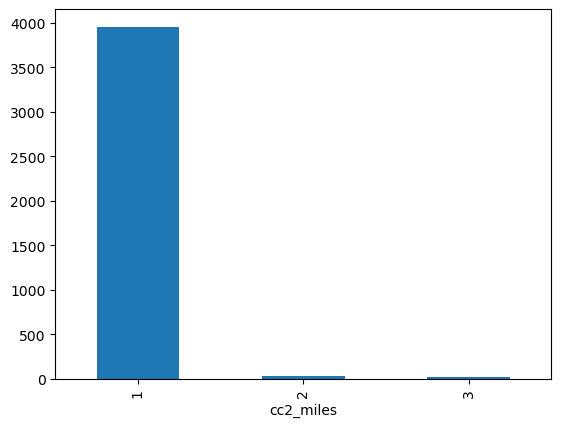

In [15]:
data["cc2_miles"].value_counts().plot(kind="bar")
data["cc2_miles"].value_counts()

cc3_miles
1    3981
4       6
5       5
3       4
2       3
Name: count, dtype: int64

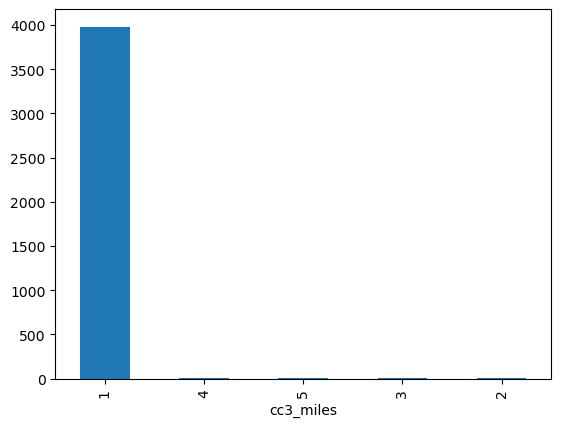

In [16]:
data["cc3_miles"].value_counts().plot(kind="bar")
data["cc3_miles"].value_counts()

# Numerical Columns

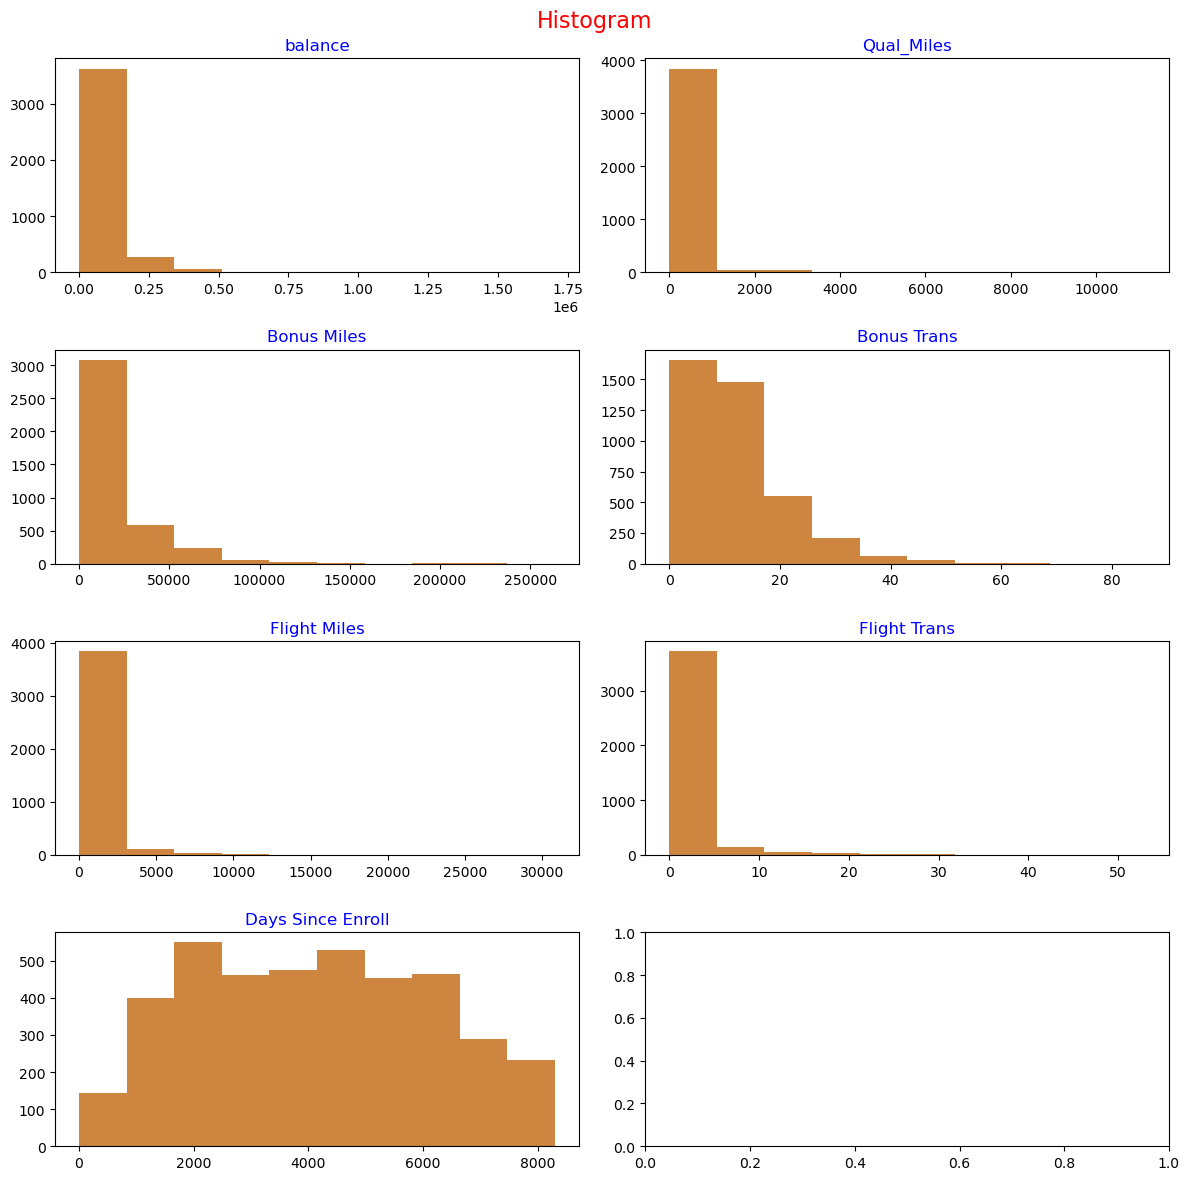

In [17]:
fig,ax=plt.subplots(nrows=4,ncols=2,figsize=(12,12))
plt.suptitle("Histogram",color="red",size=16)
ax[0,0].set_title("balance",color="blue")
ax[0,0].hist(data.balance,color="peru")
ax[0,1].set_title("Qual_Miles",color="blue")
ax[0,1].hist(data.qual_miles,color="peru")
ax[1,0].set_title("Bonus Miles",color="blue")
ax[1,0].hist(data.bonus_miles,color="peru")
ax[1,1].set_title("Bonus Trans",color="blue")
ax[1,1].hist(data.bonus_trans,color="peru")
ax[2,0].set_title("Flight Miles",color="blue")
ax[2,0].hist(data.flight_miles_12mo,color="peru")
ax[2,1].set_title("Flight Trans",color="blue")
ax[2,1].hist(data.flight_trans_12,color="peru")
ax[3,0].set_title("Days Since Enroll",color="blue")
ax[3,0].hist(data.days_since_enroll,color="peru")
plt.tight_layout()
plt.show()

In [18]:
data1.corr()

,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award
balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909
days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121


# Scatter Plots

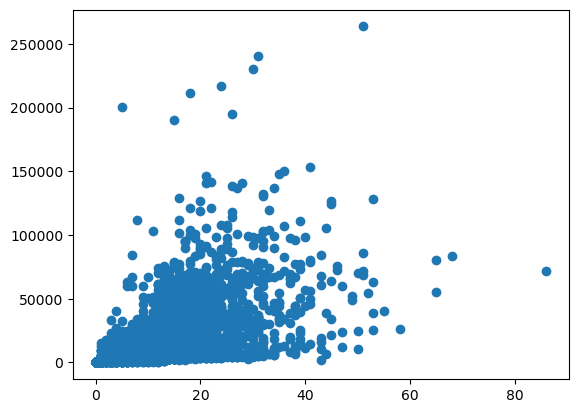

In [20]:
plt.scatter(data.bonus_trans,data.bonus_miles)

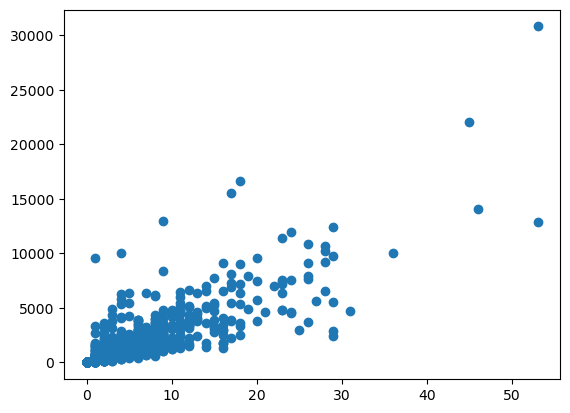

In [21]:
plt.scatter(data.flight_trans_12,data.flight_miles_12mo)

# standardize the data

In [23]:
def standard(i):
    z=(i-i.mean())/i.std()
    return z

In [24]:
std_data=standard(data1)
std_data

,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award
0,-0.451084,-0.186275,-0.769482,-0.09823,-0.062759,-0.702698,-1.103926,-0.328562,-0.362123,1.395280,-0.766823
1,-0.539389,-0.186275,-0.769482,-0.09823,-0.062759,-0.701001,-0.999801,-0.328562,-0.362123,1.379784,-0.766823
2,-0.319991,-0.186275,-0.769482,-0.09823,-0.062759,-0.539185,-0.791550,-0.328562,-0.362123,1.411744,-0.766823
3,-0.583726,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,-0.328562,-0.362123,1.372037,-0.766823
4,0.239648,-0.186275,1.409295,-0.09823,-0.062759,1.082986,1.499207,1.154788,0.692404,1.363805,1.303755
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547010,-0.186275,-0.769482,-0.09823,-0.062759,-0.356915,-0.791550,-0.185726,-0.098491,-1.314955,1.303755
3995,-0.091454,-0.186275,-0.769482,-0.09823,-0.062759,-0.669284,-0.687425,-0.328562,-0.362123,-1.318829,1.303755
3996,-0.000043,-0.186275,0.683036,-0.09823,-0.062759,0.343761,-0.375049,-0.328562,-0.362123,-1.315439,1.303755
3997,-0.185584,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,0.028527,-0.098491,-1.315924,-0.766823


# Hierarchy Cluster

In [25]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

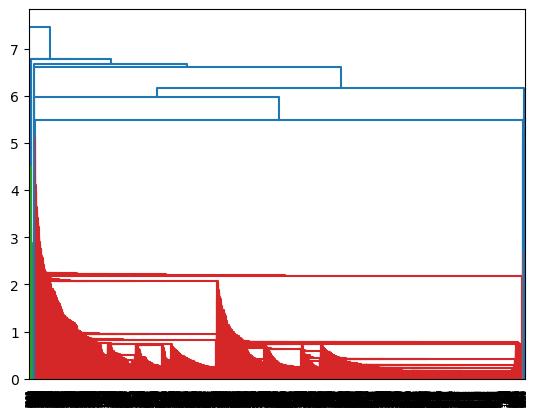

In [26]:
matrix_single=sch.linkage(std_data,metric="euclidean",method="single")
dendrogram=sch.dendrogram(matrix_single)

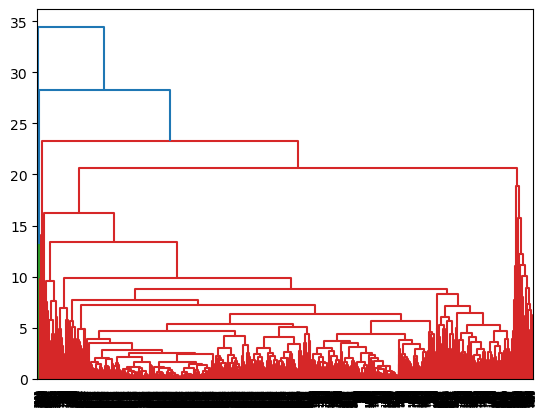

In [27]:
matrix_complete=sch.linkage(std_data,metric="euclidean",method="complete")
dendrogram=sch.dendrogram(matrix_complete)

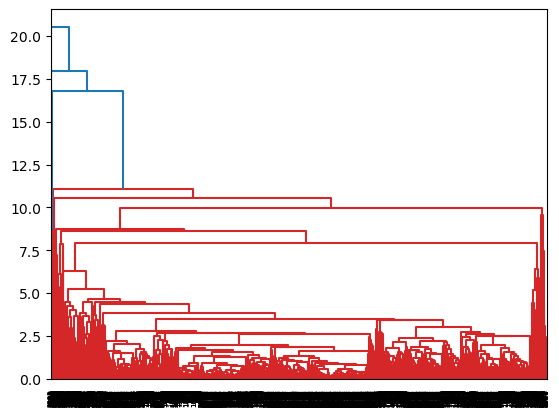

In [28]:
matrix_average=sch.linkage(std_data,metric="euclidean",method="average")
dendrogram=sch.dendrogram(matrix_average)

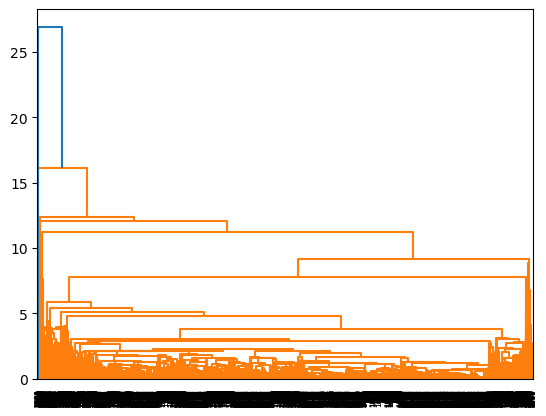

In [29]:
matrix_centroid=sch.linkage(std_data,metric="euclidean",method="centroid")
dendrogram=sch.dendrogram(matrix_centroid)

In [124]:
hc_single=AgglomerativeClustering(n_clusters=3,metric="euclidean",linkage="single")
hc_single.fit(std_data)

AgglomerativeClustering(linkage='single', metric='euclidean', n_clusters=3)

In [125]:
labels=pd.Series(hc_single.labels_)
print(labels.value_counts())

0    3983
2      15
1       1
Name: count, dtype: int64


In [126]:
hc_complete=AgglomerativeClustering(n_clusters=2,metric="euclidean",linkage="complete")
hc_complete.fit(std_data)

AgglomerativeClustering(linkage='complete', metric='euclidean')

In [127]:
labels=pd.Series(hc_complete.labels_)
print(labels.value_counts())

0    3995
1       4
Name: count, dtype: int64


In [128]:
hc_average=AgglomerativeClustering(n_clusters=3,metric="euclidean",linkage="average")
hc_average.fit(std_data)

AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=3)

In [129]:
labels=pd.Series(hc_average.labels_)
print(labels.value_counts())

0    3994
1       4
2       1
Name: count, dtype: int64


In [130]:
hc_centroid=AgglomerativeClustering(n_clusters=2,metric="euclidean",linkage="ward")
hc_centroid.fit(std_data)

AgglomerativeClustering(metric='euclidean')

In [131]:
labels=pd.Series(hc_centroid.labels_)
print(labels.value_counts())

1    2489
0    1510
Name: count, dtype: int64


In [38]:
# for no of Clusters

In [132]:
clusters=list(range(2,11))

In [133]:
for i in clusters:
    hc_centroid=AgglomerativeClustering(n_clusters=i,metric="euclidean",linkage="ward")
    hc_centroid.fit(std_data)
    labels=pd.Series(hc_centroid.labels_)
    print("No of Clusters:",i)
    print(silhouette_score(std_data,hc_centroid.labels_))
    print(labels.value_counts())

No of Clusters: 2
0.2892659524257742
1    2489
0    1510
Name: count, dtype: int64
No of Clusters: 3
0.2940432062008628
0    2489
1    1380
2     130
Name: count, dtype: int64
No of Clusters: 4
0.30814152852022964
1    2446
0    1380
2     130
3      43
Name: count, dtype: int64
No of Clusters: 5
0.3098805307874432
1    2446
0    1362
2     130
3      43
4      18
Name: count, dtype: int64
No of Clusters: 6
0.3192511970153076
0    2446
1    1232
5     130
2     130
3      43
4      18
Name: count, dtype: int64
No of Clusters: 7
0.1896533467686893
1    1239
0    1232
6    1207
5     130
2     130
3      43
4      18
Name: count, dtype: int64
No of Clusters: 8
0.18905864708439354
1    1239
6    1207
7     622
0     610
5     130
2     130
3      43
4      18
Name: count, dtype: int64
No of Clusters: 9
0.19518943663293054
0    1239
6    1207
7     622
1     589
5     130
2     130
3      43
8      21
4      18
Name: count, dtype: int64
No of Clusters: 10
0.20121590768292255
6    1207
9   

# from the n_clusters 
# 9 and 11 clusters are giving the best results

In [41]:
final_9=AgglomerativeClustering(n_clusters=9,metric="euclidean",linkage="ward")
final_9.fit(std_data)
labels_9=pd.Series(final_9.labels_)
print(labels_9.value_counts())
print(labels_9)

0    1239
6    1207
7     622
1     589
5     130
2     130
3      43
8      21
4      18
Name: count, dtype: int64
0       0
1       0
2       0
3       0
4       7
       ..
3994    0
3995    0
3996    7
3997    6
3998    6
Length: 3999, dtype: int64


In [42]:
data_9=data.copy()
data_9["labels"]=labels_9
data_9.head()

,id,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award,labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,7


In [43]:
data_9.sort_values("labels")

,id,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award,labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1218,1231,10009,0,1,1,1,0,0,0,0,5353,0,0
1217,1230,65969,0,1,1,1,2550,5,1050,3,5419,0,0
2998,3020,36844,0,2,1,1,21715,16,0,0,3161,0,0
1214,1227,8740,0,1,1,1,1250,3,0,0,5395,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,477,743745,2066,1,1,1,4100,20,2500,18,8228,1,8
313,317,714717,0,5,1,1,119162,20,1750,4,7183,1,8
1115,1127,739476,0,1,1,1,24215,8,322,1,5678,1,8
318,322,766419,0,1,1,1,11398,3,398,1,7162,1,8


In [44]:
data_9.iloc[:,1:]["labels"].value_counts()

labels
0    1239
6    1207
7     622
1     589
5     130
2     130
3      43
8      21
4      18
Name: count, dtype: int64

In [45]:
data_9.groupby("labels").mean()

,id,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award
labels,,,,,,,,,,,,
0,1435.389831,57790.446328,8.602098,1.211461,1.000000,1.000000,5211.833737,7.789346,357.041162,1.093624,5148.475383,0.364003
1,1471.721562,145628.578947,18.166384,4.125637,1.000000,1.000000,49120.556876,19.758913,332.662139,1.003396,5120.979626,0.317487
2,1765.615385,134880.892308,393.323077,2.430769,1.000000,1.000000,36582.169231,29.338462,5915.523077,16.638462,4599.607692,0.753846
3,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,1742.444444,129951.388889,65.666667,3.388889,1.000000,3.722222,86259.888889,26.222222,422.222222,1.333333,4488.777778,0.500000
5,1983.038462,110219.330769,3502.323077,1.861538,1.000000,1.000000,17226.661538,11.092308,727.153846,2.269231,4161.053846,0.600000
6,2979.215410,34564.370340,9.466446,1.277548,1.000000,1.000000,4515.278376,6.002486,68.813587,0.242751,2353.636288,0.000000
7,1902.926045,63637.593248,38.881029,3.255627,1.000000,1.000000,27698.287781,17.643087,312.779743,0.906752,4345.491961,1.000000
8,769.809524,880404.190476,510.952381,3.333333,1.000000,1.000000,62619.285714,19.333333,1316.333333,5.380952,6705.619048,0.904762


C:\Users\Bavandla dileep\OneDrive\Data Science\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 
The palette list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
C:\Users\Bavandla dileep\OneDrive\Data Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bavandla dileep\OneDrive\Data Science\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 
The palette list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
C:\Users\Bavandla dileep\OneDrive\Data Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

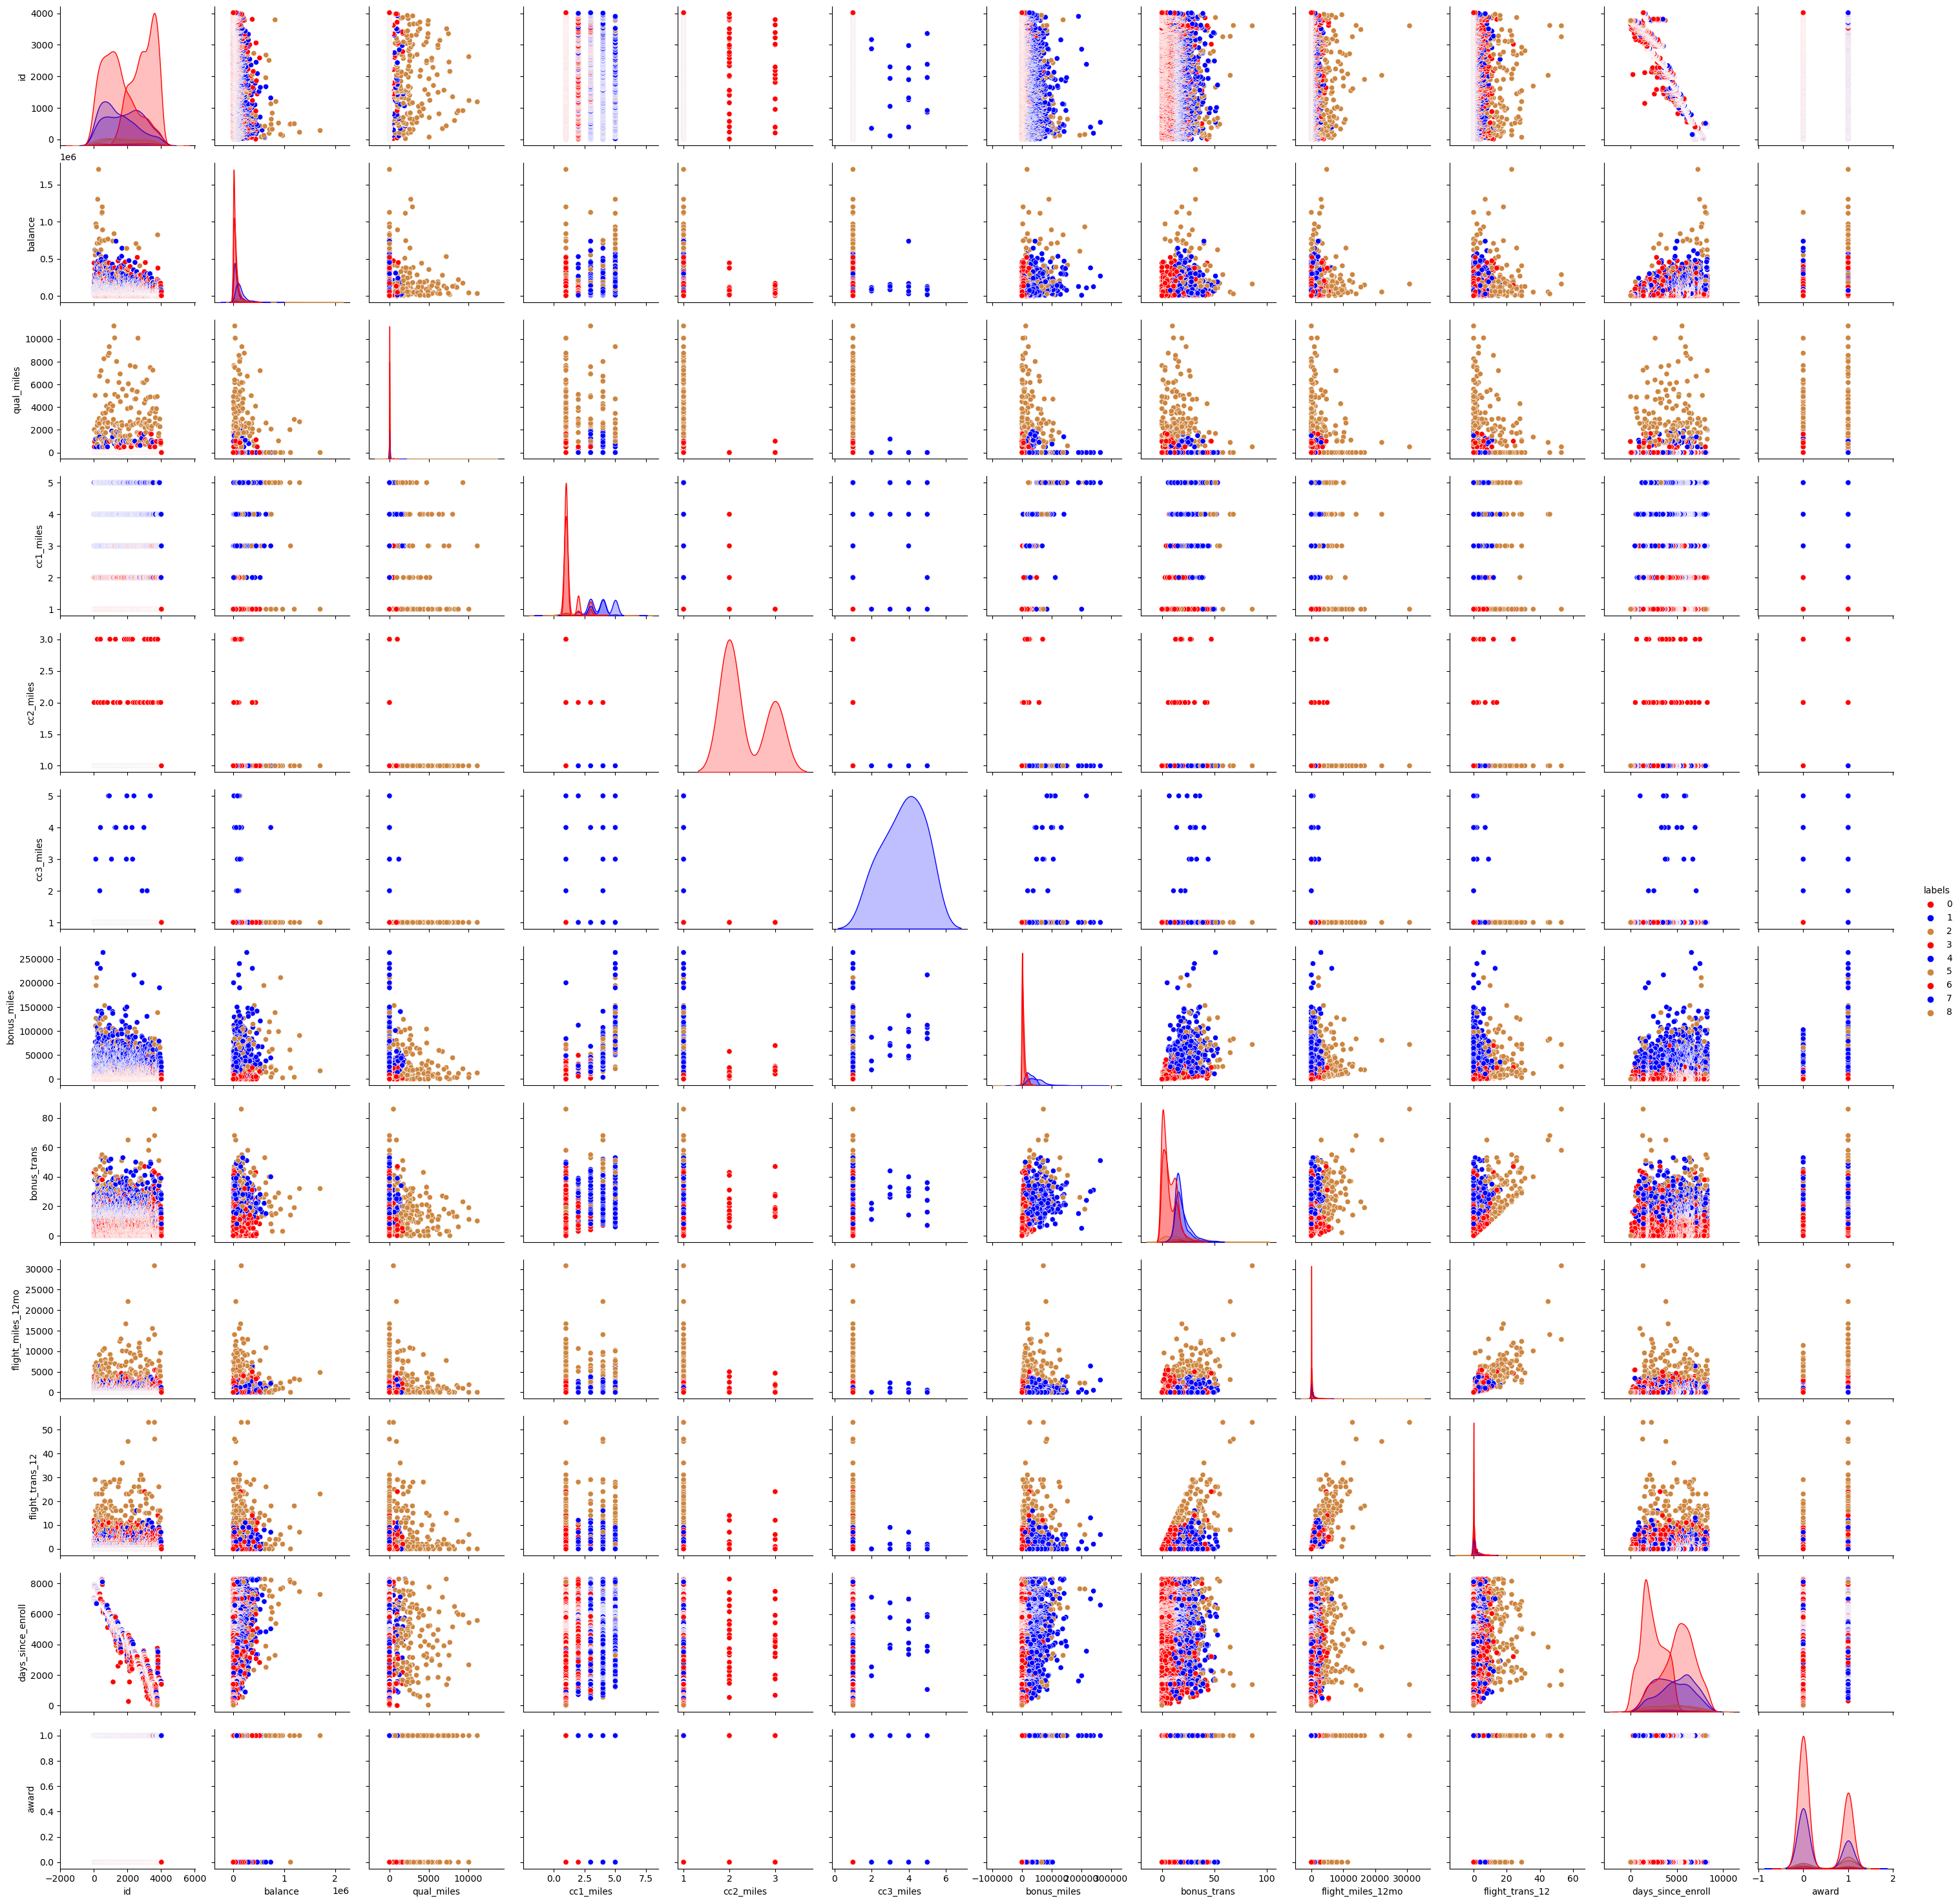

In [46]:
color=["red","blue","peru"]
sns.pairplot(data_9,hue='labels',palette=color)

In [47]:
ss_9=silhouette_score(std_data,labels_9)
ss_9

0.19518943663293054

# 11 Clusters

In [48]:
final_11=AgglomerativeClustering(n_clusters=11,metric="euclidean",linkage="ward")
final_11.fit(std_data)
labels_11=pd.Series(final_11.labels_)
print(labels_11.value_counts())
print(labels_11)

6     1207
9      669
7      622
1      570
10     393
5      196
2      130
0      130
3       43
8       21
4       18
Name: count, dtype: int64
0       9
1       9
2       9
3       9
4       7
       ..
3994    1
3995    1
3996    7
3997    6
3998    6
Length: 3999, dtype: int64


In [49]:
data_11=data.copy()
data_11["labels"]=labels_11
data_11.head()

,id,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award,labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,9
1,2,19244,0,1,1,1,215,2,0,0,6968,0,9
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,9
3,4,14776,0,1,1,1,500,1,0,0,6952,0,9
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,7


In [50]:
data_11.iloc[:,1:]["labels"].value_counts()

labels
6     1207
9      669
7      622
1      570
10     393
5      196
2      130
0      130
3       43
8       21
4       18
Name: count, dtype: int64

In [51]:
data_11.groupby("labels").mean()

,id,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award
labels,,,,,,,,,,,,
0,1765.615385,134880.892308,393.323077,2.430769,1.000000,1.000000,36582.169231,29.338462,5915.523077,16.638462,4599.607692,0.753846
1,1796.733333,78819.310526,17.821053,1.078947,1.000000,1.000000,5847.610526,6.956140,680.970175,2.070175,4520.301754,0.791228
2,1983.038462,110219.330769,3502.323077,1.861538,1.000000,1.000000,17226.661538,11.092308,727.153846,2.269231,4161.053846,0.600000
3,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,1742.444444,129951.388889,65.666667,3.388889,1.000000,3.722222,86259.888889,26.222222,422.222222,1.333333,4488.777778,0.500000
5,1228.168367,174500.219388,20.142857,4.719388,1.000000,1.000000,75151.122449,22.142857,545.076531,1.780612,5544.984694,0.954082
6,2979.215410,34564.370340,9.466446,1.277548,1.000000,1.000000,4515.278376,6.002486,68.813587,0.242751,2353.636288,0.000000
7,1902.926045,63637.593248,38.881029,3.255627,1.000000,1.000000,27698.287781,17.643087,312.779743,0.906752,4345.491961,1.000000
8,769.809524,880404.190476,510.952381,3.333333,1.000000,1.000000,62619.285714,19.333333,1316.333333,5.380952,6705.619048,0.904762


In [52]:
ss_11=silhouette_score(std_data,labels_11)
ss_11

0.217961534031848

# From 9 and 11 clusters 
# 11 clusters have more silhouette_score than 9 clusters

# 11 clusters are best

# KMEANS

In [53]:
std_data.head()

,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award
0,-0.451084,-0.186275,-0.769482,-0.09823,-0.062759,-0.702698,-1.103926,-0.328562,-0.362123,1.395280,-0.766823
1,-0.539389,-0.186275,-0.769482,-0.09823,-0.062759,-0.701001,-0.999801,-0.328562,-0.362123,1.379784,-0.766823
2,-0.319991,-0.186275,-0.769482,-0.09823,-0.062759,-0.539185,-0.791550,-0.328562,-0.362123,1.411744,-0.766823
3,-0.583726,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,-0.328562,-0.362123,1.372037,-0.766823
4,0.239648,-0.186275,1.409295,-0.09823,-0.062759,1.082986,1.499207,1.154788,0.692404,1.363805,1.303755


In [54]:
from sklearn.cluster import KMeans

In [55]:
k_values=list(range(8,16))

In [56]:
for i in k_values:
    k=KMeans(n_clusters=i,n_init="auto")
    k.fit(std_data)
    labels=pd.Series(k.labels_)
    print("K is:",i)
    print(labels.value_counts())
    print(silhouette_score(std_data,labels))

K is: 8
0    1154
5     980
3     820
1     810
4     122
6      55
7      43
2      15
Name: count, dtype: int64
0.2365540310202878
K is: 9
1    1188
8     952
4     695
3     626
0     279
5     169
6      56
2      19
7      15
Name: count, dtype: int64
0.23178856773029632
K is: 10
9    998
1    811
6    767
2    605
8    530
3     98
0     77
4     55
7     43
5     15
Name: count, dtype: int64
0.2606178050186967
K is: 11
0     1155
8      910
1      648
2      626
10     273
7      178
9       56
3       56
4       43
6       39
5       15
Name: count, dtype: int64
0.2560600942854569
K is: 12
3     860
0     752
4     705
10    504
9     429
1     363
11    168
6      71
8      52
5      43
2      37
7      15
Name: count, dtype: int64
0.2627518634598763
K is: 13
11    843
1     753
3     535
8     509
4     399
6     390
9     219
10    162
7      54
5      43
12     39
0      38
2      15
Name: count, dtype: int64
0.27209657616852745
K is: 14
1     973
11    790
10    598
3     

In [57]:
# Different K Values

In [58]:
inertia=[]
for i in k_values:
    kmeans=KMeans(n_clusters=i,n_init="auto")
    kmeans.fit(std_data)
    inertia.append(kmeans.inertia_)

pd.DataFrame({"K_value":k_values,"inertia":inertia})

,K_value,inertia
0,8,19478.195527
1,9,16270.190628
2,10,14723.300656
3,11,14682.219565
4,12,13192.064929
5,13,12661.355612
6,14,12042.251906
7,15,11794.075545


In [59]:
# scree plot/elbow plot

Text(0.5, 1.0, 'Elbow Graph/Scree Plot')

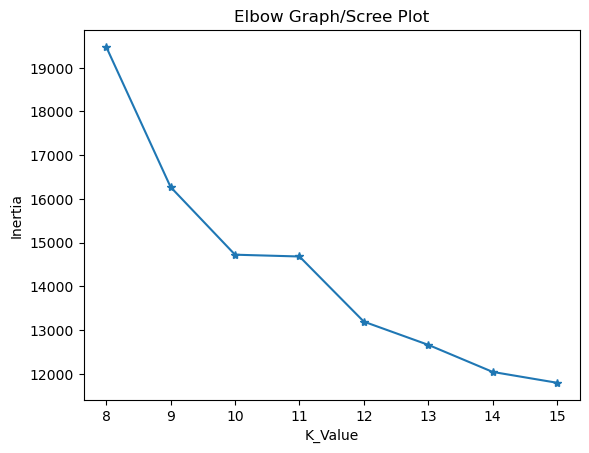

In [60]:
plt.plot(k_values,inertia,marker="*")
plt.xlabel("K_Value")
plt.ylabel("Inertia")
plt.title("Elbow Graph/Scree Plot")

In [61]:
# by looking scree plot at k=11 we find elbow
# so 11 clusters is best

In [62]:
kmeans_11=KMeans(n_clusters=11,n_init="auto")
kmeans_11.fit(std_data)
labels_k11=pd.Series(kmeans_11.labels_)
labels_k11

0       2
1       2
2       2
3       2
4       1
       ..
3994    6
3995    6
3996    6
3997    0
3998    0
Length: 3999, dtype: int32

In [63]:
data_kmeans_11=data.copy()
data_kmeans_11["labels"]=labels_k11
data_kmeans_11

,id,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award,labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,6
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,6
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,6
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [64]:
data_kmeans_11["labels"].value_counts()

labels
0     870
6     762
2     756
1     497
10    438
8     365
9     163
5      55
7      43
4      35
3      15
Name: count, dtype: int64

In [65]:
data_kmeans_11.groupby("labels").mean()

,id,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award
labels,,,,,,,,,,,,
0,3185.322989,28908.440230,37.918391,1.016092,1.000000,1.000000,2042.310345,3.726437,148.090805,0.445977,2006.195402,0.000000
1,1457.917505,120805.446680,84.414487,4.301811,1.000000,1.002012,55401.249497,20.148893,392.792757,1.213280,5131.104628,1.000000
2,1098.271164,47391.798942,31.067460,1.116402,1.000000,1.001323,3008.252646,5.601852,156.453704,0.477513,5723.215608,0.000000
3,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
4,2023.000000,162696.600000,666.428571,2.342857,1.000000,1.000000,41408.800000,38.542857,10274.257143,26.857143,4039.371429,0.942857
5,2080.963636,116472.400000,5636.345455,2.072727,1.000000,1.000000,19804.290909,12.545455,963.036364,2.890909,3950.636364,0.527273
6,1956.675853,54525.930446,91.060367,1.709974,1.000000,1.000000,10297.792651,10.095801,298.986877,0.930446,4244.868766,1.000000
7,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
8,1324.594521,153580.638356,19.084932,3.863014,1.000000,1.002740,37461.019178,17.583562,203.756164,0.567123,5363.087671,0.010959


In [66]:
ss_k11=silhouette_score(std_data,labels_k11)
ss_k11

0.2521824026143487

In [67]:
# 9 clusters

In [68]:
kmeans_9=KMeans(n_clusters=9,n_init="auto")
kmeans_9.fit(std_data)
labels_k9=pd.Series(kmeans_9.labels_)
labels_k9

0       7
1       7
2       7
3       7
4       8
       ..
3994    2
3995    2
3996    2
3997    1
3998    1
Length: 3999, dtype: int32

In [69]:
data_kmeans_9=data.copy()
data_kmeans_9["labels"]=labels_k9
data_kmeans_9

,id,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award,labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,7
1,2,19244,0,1,1,1,215,2,0,0,6968,0,7
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,7
3,4,14776,0,1,1,1,500,1,0,0,6952,0,7
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [70]:
data_kmeans_9["labels"].value_counts()

labels
1    994
2    829
7    804
3    610
8    533
0    118
5     53
4     43
6     15
Name: count, dtype: int64

In [71]:
data_kmeans_9.groupby("labels").mean()

,id,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award
labels,,,,,,,,,,,,
0,1773.822034,183139.669492,544.881356,2.237288,1.000000,1.000000,34671.288136,29.211864,6290.432203,18.000000,4591.601695,0.796610
1,3201.112676,31352.409457,37.533199,1.093561,1.000000,1.000000,2948.970825,5.638833,150.391348,0.443662,1983.079477,0.000000
2,1951.372738,58427.630881,95.675513,1.740651,1.000000,1.000000,11007.180941,10.749095,410.034982,1.259349,4254.276236,1.000000
3,1863.304918,109884.598361,20.942623,3.368852,1.000000,1.001639,27720.980328,17.318033,179.311475,0.518033,4398.754098,0.000000
4,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
5,2103.452830,115637.509434,5695.283019,1.962264,1.000000,1.000000,17370.320755,12.018868,890.811321,2.679245,3911.264151,0.509434
6,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
7,1144.276119,47738.006219,32.322139,1.104478,1.000000,1.001244,3000.528607,5.993781,183.694030,0.553483,5633.161692,0.000000
8,1421.585366,143617.378987,98.688555,4.303940,1.000000,1.001876,56531.645403,21.084428,508.720450,1.617261,5198.617261,0.949343


In [72]:
ss_k9=silhouette_score(std_data,labels_k9)
ss_k9

0.251460632530221

# DBSCAN

In [73]:
std_data.head()

,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award
0,-0.451084,-0.186275,-0.769482,-0.09823,-0.062759,-0.702698,-1.103926,-0.328562,-0.362123,1.395280,-0.766823
1,-0.539389,-0.186275,-0.769482,-0.09823,-0.062759,-0.701001,-0.999801,-0.328562,-0.362123,1.379784,-0.766823
2,-0.319991,-0.186275,-0.769482,-0.09823,-0.062759,-0.539185,-0.791550,-0.328562,-0.362123,1.411744,-0.766823
3,-0.583726,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,-0.328562,-0.362123,1.372037,-0.766823
4,0.239648,-0.186275,1.409295,-0.09823,-0.062759,1.082986,1.499207,1.154788,0.692404,1.363805,1.303755


In [74]:
from sklearn.cluster import DBSCAN

In [75]:
ep=[0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5]
samples=[5,6,7,8,9,10]

In [76]:
for i in ep:
    for j in samples:
        dbscan=DBSCAN(eps=i,min_samples=j)
        dbscan.fit(std_data)
        labels=pd.Series(dbscan.labels_)
        print("eps:",i,"and min pts:",j)
        print(labels.value_counts())

eps: 0.8 and min pts: 5
 0    2227
 1     956
-1     776
 3      12
 7       7
 2       6
 6       6
 4       5
 5       4
Name: count, dtype: int64
eps: 0.8 and min pts: 6
 0    2216
 1     944
-1     820
 2      12
 3       7
Name: count, dtype: int64
eps: 0.8 and min pts: 7
 0    2209
 1     934
-1     839
 2      10
 3       7
Name: count, dtype: int64
eps: 0.8 and min pts: 8
 0    2204
 1     923
-1     862
 2      10
Name: count, dtype: int64
eps: 0.8 and min pts: 9
 0    2194
 1     915
-1     890
Name: count, dtype: int64
eps: 0.8 and min pts: 10
 0    2183
-1     912
 1     896
 2       8
Name: count, dtype: int64
eps: 0.9 and min pts: 5
 0    2273
 1    1033
-1     657
 3      13
 5       8
 2       5
 4       5
 6       5
Name: count, dtype: int64
eps: 0.9 and min pts: 6
 0    2267
 1    1012
-1     692
 3      13
 4       8
 2       7
Name: count, dtype: int64
eps: 0.9 and min pts: 7
 0    2248
 1    1004
-1     713
 4      11
 5       7
 2       6
 3       5
 6       5
Nam

In [77]:
dbscan_final=DBSCAN(eps=1.5,min_samples=5)
dbscan_final.fit(std_data)
labels_dbscan=pd.Series(dbscan_final.labels_)
labels_dbscan

0       0
1       0
2       0
3       0
4       1
       ..
3994    1
3995    1
3996    1
3997    0
3998    0
Length: 3999, dtype: int64

In [78]:
data_dbscan=data.copy()
data_dbscan["labels"]=labels_dbscan
data_dbscan

,id,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award,labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [79]:
data_dbscan["labels"].value_counts()

labels
 0    2411
 1    1250
-1     310
 2      15
 3       8
 4       5
Name: count, dtype: int64

In [80]:
data_dbscan[data_dbscan["labels"]==3]

,id,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award,labels
1270,1283,16103,0,1,3,1,10819,13,0,0,5427,0,3
1791,1808,32510,0,1,3,1,14568,13,0,0,4341,0,3
1918,1935,52139,0,1,3,1,16314,14,250,1,3965,0,3
2278,2296,30171,0,1,3,1,15370,13,0,0,3853,0,3
3203,3225,64924,0,1,3,1,14971,13,0,0,1989,0,3
3367,3390,23197,0,1,3,1,10587,13,150,1,1747,0,3
3611,3634,37300,0,1,3,1,23760,19,0,0,676,0,3
3779,3802,35850,0,1,3,1,17759,18,0,0,3439,0,3


In [81]:
data_dbscan.groupby("labels").mean()

,id,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award
labels,,,,,,,,,,,,
-1,1643.106452,215733.335484,1381.900000,2.764516,1.070968,1.158065,45721.603226,25.261290,2994.580645,8.758065,4818.754839,0.729032
0,2180.509747,56525.714641,29.252178,1.684363,1.000000,1.000000,9589.272501,8.728743,173.045209,0.512650,3805.321858,0.000000
1,1774.310400,72115.619200,61.918400,2.632000,1.000000,1.000000,24773.415200,13.712800,392.944800,1.223200,4567.045600,1.000000
2,2453.933333,38556.733333,0.000000,1.000000,2.000000,1.000000,8951.533333,12.933333,60.000000,0.400000,3390.400000,0.000000
3,2671.625000,36524.250000,0.000000,1.000000,3.000000,1.000000,15518.500000,14.500000,50.000000,0.250000,3179.625000,0.000000
4,2924.200000,31161.600000,0.000000,1.000000,2.000000,1.000000,8723.400000,13.800000,350.000000,1.000000,3314.800000,1.000000


In [82]:
ss_dbscan=silhouette_score(std_data,labels_dbscan)
ss_dbscan

0.2537475380416267

In [83]:
# visualize

In [84]:
# using the pca 

In [85]:
from sklearn.decomposition import PCA

In [86]:
pca=PCA()
pca_components=pca.fit_transform(std_data)
col=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11",]
pca_components=pd.DataFrame(pca_components,columns=col)
pca_components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.466491,-0.067174,-0.802780,0.293779,0.117851,1.327669,-0.268634,-0.678271,0.361840,0.062961,-0.025350
1,-1.450383,-0.063735,-0.751927,0.290300,0.096710,1.275684,-0.300362,-0.759303,0.292570,0.081557,-0.013226
2,-1.209899,-0.133538,-0.764841,0.312399,0.107139,1.310701,-0.159680,-0.697060,0.179045,0.204474,0.035279
3,-1.507013,-0.061521,-0.754361,0.279895,0.099630,1.271411,-0.330197,-0.756102,0.384809,0.077897,-0.028468
4,3.006608,-0.185511,-0.241210,0.343234,-0.559210,0.222111,-0.848909,-0.609173,-0.083886,-0.266563,0.320986
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.954910,0.459963,0.385779,-0.278480,-0.181817,-0.911676,-1.147651,1.252428,0.151951,0.204118,-0.046805
3995,-1.032442,0.301065,0.211895,-0.215853,-0.090761,-0.794402,-0.928996,1.567177,-0.193837,0.001792,0.058184
3996,0.173514,-0.611733,0.408429,-0.278057,-0.281927,-1.271261,-0.598413,1.229008,0.366101,-0.297774,-0.087200
3997,-1.695029,0.726440,0.438625,-0.414759,-0.153110,-0.260816,0.581194,0.567665,0.419965,-0.072723,-0.016016


In [87]:
# weights

In [88]:
weights=pd.DataFrame(pca.components_)
weights

,0,1,2,3,4,5,6,7,8,9,10
0,0.317662,0.083613,0.403491,0.003422,0.077669,0.445382,0.444998,0.305592,0.322702,0.189247,0.305818
1,-0.044449,0.179993,-0.406270,0.067472,-0.133172,-0.306373,-0.024596,0.574040,0.570663,-0.167499,-0.024101
2,-0.269604,-0.425610,0.018357,0.367686,0.561327,0.135536,0.188203,0.083768,0.068896,-0.465874,-0.113841
3,0.054361,-0.220268,-0.020224,0.819789,-0.442535,-0.054085,0.051629,-0.057704,-0.031638,0.255715,0.070106
4,0.121690,0.729643,-0.116798,0.409867,0.481105,-0.005706,-0.086914,-0.123278,-0.097152,0.086146,0.008608
5,0.299731,-0.396700,-0.229503,-0.066928,0.433862,-0.125136,-0.148193,0.097809,0.100476,0.637278,-0.209757
6,0.519619,0.065162,0.109535,0.045596,-0.163489,0.093840,0.095423,0.000813,-0.001579,-0.262145,-0.773505
7,0.653631,-0.191882,-0.174180,0.019012,0.046460,-0.053961,-0.284449,-0.084052,-0.061226,-0.412835,0.487873
8,-0.127349,-0.000840,0.232282,0.096828,-0.042273,0.471374,-0.779118,0.277765,0.074659,0.012281,-0.081037
9,-0.050356,0.001921,-0.688841,-0.061894,-0.120197,0.656620,0.129069,-0.223896,0.074334,0.026123,-0.023113


In [89]:
# vaiances

In [90]:
pca_components.var()
variance=pd.DataFrame(pca_components.var(),columns=["variances"])
variance

,variances
PC1,3.285441
PC2,1.728059
PC3,1.054673
PC4,1.009294
PC5,0.960202
PC6,0.912161
PC7,0.806743
PC8,0.620562
PC9,0.360240
PC10,0.138637


In [91]:
percent_variance=(pca_components.var()/np.sum(pca_components.var())) * 100
percent_variance

PC1     29.867646
PC2     15.709627
PC3      9.587939
PC4      9.175396
PC5      8.729112
PC6      8.292369
PC7      7.334030
PC8      5.641475
PC9      3.274908
PC10     1.260337
PC11     1.127162
dtype: float64

In [92]:
# Using Model

In [93]:
pca.explained_variance_

array([3.28544106, 1.72805894, 1.05467334, 1.00929354, 0.96020229,
       0.91216055, 0.80674331, 0.62056222, 0.36023984, 0.13863709,
       0.12398782])

In [94]:
pca.explained_variance_ratio_ * 100

array([29.86764604, 15.70962673,  9.58793945,  9.17539578,  8.72911177,
        8.29236866,  7.33403008,  5.64147473,  3.27490761,  1.26033715,
        1.127162  ])

In [95]:
# Data Frame with variances

In [96]:
cumsum=np.cumsum(percent_variance)
variance["perccentage"]=percent_variance
variance["Cumsum"]=cumsum
variance

,variances,perccentage,Cumsum
PC1,3.285441,29.867646,29.867646
PC2,1.728059,15.709627,45.577273
PC3,1.054673,9.587939,55.165212
PC4,1.009294,9.175396,64.340608
PC5,0.960202,8.729112,73.069720
PC6,0.912161,8.292369,81.362088
PC7,0.806743,7.334030,88.696119
PC8,0.620562,5.641475,94.337593
PC9,0.360240,3.274908,97.612501
PC10,0.138637,1.260337,98.872838


# first two pc's contains 45% of information

# scatter Plot

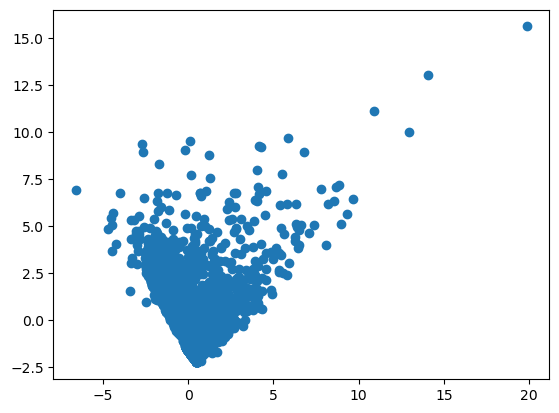

In [97]:
plt.scatter(pca_components.PC2,pca_components.PC1)

In [98]:
# correlation b/w pc's

In [99]:
np.round(pca_components.corr(),4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
PC1,1.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0
PC2,-0.0,1.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0
PC3,0.0,-0.0,1.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0
PC4,-0.0,0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
PC5,-0.0,-0.0,0.0,-0.0,1.0,0.0,-0.0,0.0,-0.0,0.0,0.0
PC6,-0.0,0.0,0.0,-0.0,0.0,1.0,0.0,0.0,-0.0,-0.0,-0.0
PC7,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,1.0,-0.0,-0.0,0.0,0.0
PC8,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,1.0,0.0,-0.0,0.0
PC9,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,1.0,-0.0,0.0
PC10,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,1.0,0.0


In [100]:
# hence there is no relationship b/w PC's

In [101]:
from sklearn.manifold import TSNE
from bioinfokit .visuz import cluster

In [108]:
data_tsne=TSNE().fit_transform(data_kmeans_9.iloc[:,:-1])
data_tsne

array([[-40.821472 , -25.618917 ],
       [-53.230778 , -10.649984 ],
       [ -3.2624326, -40.524166 ],
       ...,
       [ 26.184486 ,  -9.207939 ],
       [ 14.007916 , -39.068165 ],
       [-40.649025 ,  41.77223  ]], dtype=float32)

In [109]:
cluster.tsneplot(score=data_tsne)

In [104]:
# colors

In [114]:
color_class=data_kmeans_9["labels"].to_numpy()
cluster.tsneplot(score=data_tsne,colorlist=color_class,legendpos="best")

In [ ]:
plt.scatter(data_9.award,labels,hue="labels")

In [ ]:
help(sch.linkage)

In [113]:
help(cluster.tsneplot)

Help on function tsneplot in module bioinfokit.visuz:

tsneplot(score=None, axlabelfontsize=9, axlabelfontname='Arial', figtype='png', r=300, show=False, markerdot='o', dotsize=6, valphadot=1, colordot='#4a4e4d', colorlist=None, legendpos='best', figname='tsne_2d', dim=(6, 4), legendanchor=None, theme=None)

